In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
arr = np.random.randint(0, 10, 10)
ind = pd.Series(arr)

In [3]:
ind

0    9
1    6
2    5
3    0
4    8
5    8
6    8
7    6
8    6
9    8
dtype: int64

In [4]:
ind.index

RangeIndex(start=0, stop=10, step=1)

In [5]:
ind.values

array([9, 6, 5, 0, 8, 8, 8, 6, 6, 8])

In [6]:
d = dict()
d['mass'] = 10
d['diameter'] = 100
d['day_length'] = 111

In [7]:
s = pd.Series(d)

In [8]:
s

mass           10
diameter      100
day_length    111
dtype: int64

In [9]:
s.index

Index(['mass', 'diameter', 'day_length'], dtype='object')

In [11]:
s.value_counts()

10     1
100    1
111    1
dtype: int64

In [12]:
s.values

array([ 10, 100, 111])

In [13]:
s = pd.Series([0.0, 11, 1, 1, 2, 3, 4], index=[1, 2, 3, 4, 5, 6, 7])

In [14]:
s

1     0.0
2    11.0
3     1.0
4     1.0
5     2.0
6     3.0
7     4.0
dtype: float64

In [16]:
# s[0] # error

In [17]:
s.loc[1]

0.0

In [18]:
s.iloc[1]

11.0

In [19]:
s.iloc[-1]

4.0

In [21]:
# s.loc[-1] # error

In [22]:
s

1     0.0
2    11.0
3     1.0
4     1.0
5     2.0
6     3.0
7     4.0
dtype: float64

In [24]:
s[7]

4.0

In [25]:
s.loc[7]

4.0

In [30]:
s = pd.Series("a", index=[1, 2, 3, 4]) 

In [32]:
s[1]

'a'

In [34]:
s = pd.Series("a", index=[1, 2, 3, 4]) 
print(s.loc[2])

a


In [35]:
pd.__version__

'1.5.3'

In [36]:
data = set([2,1,4,3]) 
s = pd.Series( data , index=[1,2,3,4]) 
print(s.loc[2])

TypeError: 'set' type is unordered

In [37]:
data = list(set([2,1,4,3]))
s = pd.Series( data , index=[1,2,3,4]) 
print(s.loc[2])

2


In [38]:
data

[1, 2, 3, 4]

In [39]:
data = [1, 2, 3, 4] 
s = pd.Series( data , index=[1,2,3,4]) 
b = (s > 2).any() 
print(b)

True


In [112]:
data = [0, 1, 1, 2, 3, 5, 8, 13, 21] 
s = pd.Series( data ) 
b = s.diff() 
print(b.iloc[5])

2.0


In [91]:
s.diff()

0    NaN
1    1.0
2    0.0
3    1.0
4    1.0
5    2.0
6    3.0
7    5.0
8    8.0
dtype: float64

In [113]:
b[5]

2.0

# Nifty Case Study

In [99]:
s = pd.read_csv('nifty.csv', index_col=0).loc[:, 'Close']

# same as this bellow 
#s = pd.read_csv('nifty.csv', index_col=0).iloc[:, 0]

In [50]:
s.head(10)

Date
01-Jan-2019    10910.10
02-Jan-2019    10792.50
03-Jan-2019    10672.25
04-Jan-2019    10727.35
07-Jan-2019    10771.80
08-Jan-2019    10802.15
09-Jan-2019    10855.15
10-Jan-2019    10821.60
11-Jan-2019    10794.95
14-Jan-2019    10737.60
Name: Close, dtype: float64

In [51]:
s.tail(10)

Date
17-Dec-2019    12165.00
18-Dec-2019    12221.65
19-Dec-2019    12259.70
20-Dec-2019    12271.80
23-Dec-2019    12262.75
24-Dec-2019    12214.55
26-Dec-2019    12126.55
27-Dec-2019    12245.80
30-Dec-2019    12255.85
31-Dec-2019    12168.45
Name: Close, dtype: float64

In [52]:
np.mean(s)

11432.632244897959

In [54]:
s.info()

<class 'pandas.core.series.Series'>
Index: 245 entries, 01-Jan-2019 to 31-Dec-2019
Series name: Close
Non-Null Count  Dtype  
--------------  -----  
245 non-null    float64
dtypes: float64(1)
memory usage: 11.9+ KB


In [55]:
s.shape

(245,)

## What fraction of days did the markets close higher than the previous day's close ?

In [100]:
s = pd.read_csv('nifty.csv', index_col=0).loc[:, 'Close']


In [101]:
s[0]

10910.1

In [102]:
s[1]

10792.5

In [103]:
s[1] - s[0]

-117.60000000000036

In [104]:
s.iloc[1:]

Date
02-Jan-2019    10792.50
03-Jan-2019    10672.25
04-Jan-2019    10727.35
07-Jan-2019    10771.80
08-Jan-2019    10802.15
                 ...   
24-Dec-2019    12214.55
26-Dec-2019    12126.55
27-Dec-2019    12245.80
30-Dec-2019    12255.85
31-Dec-2019    12168.45
Name: Close, Length: 244, dtype: float64

In [105]:
s.iloc[:-1]

Date
01-Jan-2019    10910.10
02-Jan-2019    10792.50
03-Jan-2019    10672.25
04-Jan-2019    10727.35
07-Jan-2019    10771.80
                 ...   
23-Dec-2019    12262.75
24-Dec-2019    12214.55
26-Dec-2019    12126.55
27-Dec-2019    12245.80
30-Dec-2019    12255.85
Name: Close, Length: 244, dtype: float64

In [106]:
s.iloc[1:] - s.iloc[:-1]

Date
01-Apr-2019    0.0
01-Aug-2019    0.0
01-Feb-2019    0.0
01-Jan-2019    NaN
01-Jul-2019    0.0
              ... 
31-Dec-2019    NaN
31-Jan-2019    0.0
31-Jul-2019    0.0
31-May-2019    0.0
31-Oct-2019    0.0
Name: Close, Length: 245, dtype: float64

In [107]:
s.values[1:] - s.values[:-1]

array([-1.1760e+02, -1.2025e+02,  5.5100e+01,  4.4450e+01,  3.0350e+01,
        5.3000e+01, -3.3550e+01, -2.6650e+01, -5.7350e+01,  1.4920e+02,
        3.5000e+00,  1.4900e+01,  1.7500e+00,  5.4900e+01, -3.9100e+01,
       -9.1250e+01,  1.8300e+01, -6.9250e+01, -1.1900e+02, -9.3500e+00,
       -4.0000e-01,  1.7915e+02,  6.2700e+01,  1.8600e+01,  2.2100e+01,
        1.2810e+02,  6.9500e+00, -1.2580e+02, -5.4800e+01, -5.7400e+01,
       -3.7750e+01, -4.7600e+01, -2.1650e+01, -8.3450e+01, -3.6600e+01,
        1.3110e+02,  5.4400e+01,  1.8000e+00,  8.8450e+01, -4.4800e+01,
       -2.8650e+01, -1.4150e+01,  7.1000e+01,  1.2395e+02,  6.5550e+01,
        5.2000e+00, -2.2800e+01,  1.3265e+02,  1.3315e+02,  4.0500e+01,
        1.5500e+00,  8.3600e+01,  3.5350e+01,  7.0200e+01, -1.1350e+01,
       -6.4150e+01, -1.0265e+02,  1.2900e+02, -3.8200e+01,  1.2495e+02,
        5.3900e+01,  4.5250e+01,  4.4050e+01, -6.9250e+01, -4.5950e+01,
        6.7950e+01, -6.1450e+01,  6.7450e+01, -8.7650e+01,  1.24

In [108]:
np.sum(s.values[1:] - s.values[:-1] > 0) 

129

In [109]:
np.sum(s.values[1:] - s.values[:-1] > 0) / len(s)

0.5265306122448979

In [110]:
np.sum(s.diff() > 0)

129

In [111]:
np.sum(s.diff() > 0) / len(s)

0.5265306122448979

## Compute the moving avg of last 5 days 

In [115]:
s = pd.read_csv('nifty.csv', index_col=0).loc[:, 'Close']

s

Date
01-Jan-2019    10910.10
02-Jan-2019    10792.50
03-Jan-2019    10672.25
04-Jan-2019    10727.35
07-Jan-2019    10771.80
                 ...   
24-Dec-2019    12214.55
26-Dec-2019    12126.55
27-Dec-2019    12245.80
30-Dec-2019    12255.85
31-Dec-2019    12168.45
Name: Close, Length: 245, dtype: float64

In [116]:
def moving_average(x, w):
    return np.convolve(x, np.ones(w), 'valid') / w

In [117]:
moving_average(s, 5)

array([10774.8 , 10753.21, 10765.74, 10795.61, 10809.13, 10802.29,
       10819.22, 10826.25, 10842.97, 10865.37, 10910.22, 10917.41,
       10905.65, 10894.57, 10869.29, 10809.23, 10755.12, 10719.18,
       10715.41, 10738.03, 10788.17, 10844.6 , 10926.73, 10974.42,
       10984.41, 10979.72, 10959.13, 10905.37, 10840.7 , 10796.86,
       10747.29, 10701.88, 10690.24, 10699.  , 10712.45, 10760.28,
       10806.47, 10820.71, 10821.24, 10835.61, 10857.08, 10900.62,
       10950.93, 10999.51, 11060.42, 11123.17, 11180.91, 11237.92,
       11316.21, 11375.04, 11421.28, 11457.15, 11479.88, 11465.36,
       11469.57, 11452.1 , 11461.89, 11495.29, 11558.27, 11604.26,
       11644.04, 11649.64, 11658.05, 11645.12, 11636.87, 11624.94,
       11624.68, 11620.18, 11637.35, 11660.39, 11694.09, 11693.64,
       11680.14, 11687.3 , 11658.23, 11658.6 , 11689.34, 11719.1 ,
       11716.32, 11707.61, 11656.26, 11578.52, 11493.93, 11407.26,
       11317.25, 11262.08, 11221.59, 11212.65, 11238.3 , 11374

In [134]:
s

Date
01-Jan-2019    10910.10
02-Jan-2019    10792.50
03-Jan-2019    10672.25
04-Jan-2019    10727.35
07-Jan-2019    10771.80
                 ...   
24-Dec-2019    12214.55
26-Dec-2019    12126.55
27-Dec-2019    12245.80
30-Dec-2019    12255.85
31-Dec-2019    12168.45
Name: Close, Length: 245, dtype: float64

In [135]:
s.index

Index(['01-Jan-2019', '02-Jan-2019', '03-Jan-2019', '04-Jan-2019',
       '07-Jan-2019', '08-Jan-2019', '09-Jan-2019', '10-Jan-2019',
       '11-Jan-2019', '14-Jan-2019',
       ...
       '17-Dec-2019', '18-Dec-2019', '19-Dec-2019', '20-Dec-2019',
       '23-Dec-2019', '24-Dec-2019', '26-Dec-2019', '27-Dec-2019',
       '30-Dec-2019', '31-Dec-2019'],
      dtype='object', name='Date', length=245)

In [136]:
new_index = map(pd.Timestamp, s.index)

In [137]:
nifty = pd.Series(s.values, index=new_index)

In [141]:
nifty.rolling('5d').sum()

2019-01-01    10910.10
2019-01-02    21702.60
2019-01-03    32374.85
2019-01-04    43102.20
2019-01-07    32171.40
                ...   
2019-12-24    36749.10
2019-12-26    36603.85
2019-12-27    48849.65
2019-12-30    36628.20
2019-12-31    36670.10
Length: 245, dtype: float64

## Find the avg of only Friday

In [150]:
only_friday = nifty[nifty.index.day_of_week == 4]

In [151]:
np.mean(only_friday)

11435.39411764706

In [152]:
data = [3,2,2,1] 
s = pd.Series( data ) 
b = s.mean() 
print(b) 

2.0


In [153]:
import seaborn as sns
titanic = sns.load_dataset('titanic')

In [154]:
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


<Axes: xlabel='class', ylabel='fare'>

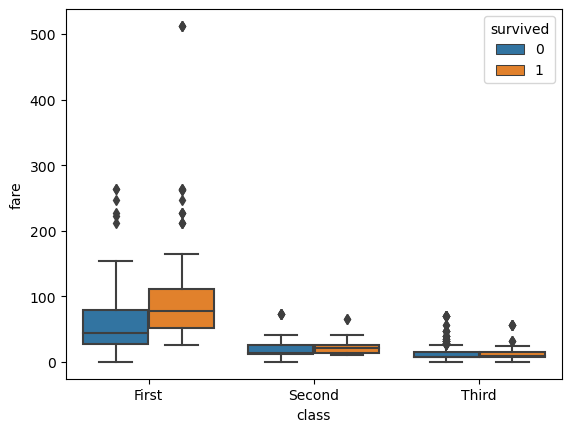

In [155]:
# Filter the dataset by class
class_1 = titanic[titanic['class'] == 'First']
class_2 = titanic[titanic['class'] == 'Second']
class_3 = titanic[titanic['class'] == 'Third']

# Plot fare vs. survival for each class
sns.boxplot(x='class', y='fare', hue='survived', data=titanic)

<Axes: xlabel='class', ylabel='fare'>

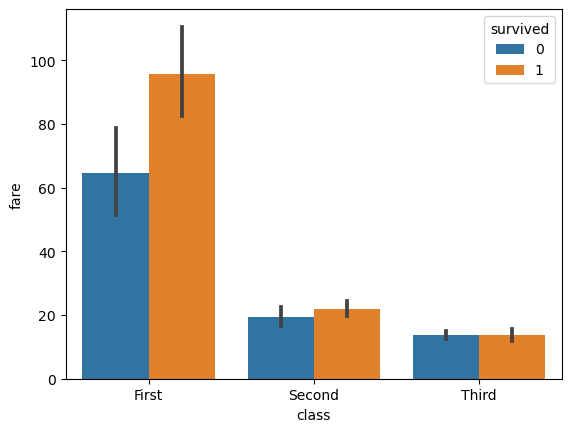

In [156]:
sns.barplot(x='class', y='fare', hue='survived', data=titanic)

In [164]:
print(class_1.groupby('alive').median('fare')['fare'])
print(class_1.groupby('alive').mean('fare')['fare'])

alive
no     44.7500
yes    77.9583
Name: fare, dtype: float64
alive
no     64.684007
yes    95.608029
Name: fare, dtype: float64


In [163]:
print(class_2.groupby('alive').median('fare')['fare'])
print(class_2.groupby('alive').mean('fare')['fare'])

alive
no     13.0
yes    21.0
Name: fare, dtype: float64
alive
no     19.412328
yes    22.055700
Name: fare, dtype: float64


In [165]:
print(class_3.groupby('alive').median('fare')['fare'])
print(class_3.groupby('alive').mean('fare')['fare'])

alive
no     8.0500
yes    8.5167
Name: fare, dtype: float64
alive
no     13.669364
yes    13.694887
Name: fare, dtype: float64


In [170]:
titanic.head(5)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [171]:
titanic['survived'] == 1

0      False
1       True
2       True
3       True
4      False
       ...  
886    False
887     True
888    False
889     True
890    False
Name: survived, Length: 891, dtype: bool

In [181]:
df_alone_surv = titanic[(titanic['alone'] == True) & (titanic['survived'] == 1)]

In [182]:
df_alone_but_not_surv = titanic[(titanic['alone'] == True) & (titanic['survived'] != 1)]

In [183]:
df_alone_surv.age.median() > df_alone_but_not_surv.age.median()

True

In [184]:
df_alone_but_not_surv.age.median() > df_alone_surv.age.median()

False

In [185]:
df_not_alone_surv = titanic[(titanic['alone'] == False) & (titanic['survived'] == 1)]

In [186]:
df_not_alone_not_surv = titanic[(titanic['alone'] == False) & (titanic['survived'] != 1)]

In [187]:
df_not_alone_not_surv.age.median() < df_not_alone_surv.age.median() 

False

In [188]:
df_not_alone_surv.age.median() < df_not_alone_not_surv.age.median()

True